<h1 style="color:navy">III. L-Layer Neural Network</h1>

Bu bölümde ikiden fazla katman içeren yapay sinir ağlarını (YSA) inceleyeceğiz. Fakat meydana getireceğimiz kod yapısı aynı zamanda iki katmanlı ağları da destekler nitelikte olacaktır. 2-Layer YSA ile benzer yönleri bulunduğu için, tekrar olmaması açısından <i>daha önce anlatılan ayrıntılara yer verilmeyecektir</i>.

**L**, YSA'daki katman sayısını ifade etmektedir. Öncelikle bir katmandan diğer katmana geçerken yapılan işlemleri bir araya getirip, bunu her katman geçişlerinde nasıl kullanacağımızı belirleyeceğiz, ardından dilediğimiz sayıdaki katman ile YSA'larımızı oluşturabileceğiz. L-Layer YSA'da bir katmandan diğerine geçerken kullanacağımız formüller aşağıda özetlenmiştir. 

<img src="https://raw.githubusercontent.com/zkcplk/Deep-Learning/main/images/10_forward_backward_propagations.png">

L-Layer YSA'da, 2-Layer YSA için kullandığımız **tanh()** fonksiyonu yerine **ReLU (Rectified Linear Unit)** fonksiyonunu kullanacağız. ReLU'ya geçiş, Gradient Descent'in çok daha hızlı ve verimli çalışmasını sağlar. Böylece hesaplamalar hızlanır ve çalışma süresi azalır.

$$A = ReLU(Z) = max(0, Z) $$

<img src="https://raw.githubusercontent.com/zkcplk/Deep-Learning/main/images/11_sigmoid_relu_functions.jpg">

2-Layer YSA'da olduğu gibi, her katmanda ayrı ayrı $w$ ve $b$ değerleri üretileceğinden, her katman için bu değerlerin başlangıç değerlerini random olarak belirleyeceğiz. Daha sonra, her tür çok katmanlı YSA'da kullanabilmek için çok katmanlı **model** fonksiyonumuzu oluşturacağız. 

Forward ve backward prop. işlemleri, daha önce kullandıklarımızdan biraz farklı olacaktır. Yukarıda da belirttiğimiz gibi, tanh() yerine relu() fonksiyonunu kullanacağız. Bu amaçla son katman hariç, tüm katmanlarda kullanacağımız aktivasyon fonksiyonumuz **relu()** olacaktır. Kısaca L-Layer bir ağda, forward prop. işlemi için L-1 kez relu() kullanılacaktır.

Aşağıda çok katmanlı bir YSA için tek turlu bir forward-backward prop. işleminin görseli bulunmaktadır. Mor kutular, forward işlemlerini; kırmızı kutular ise, backward işlemlerini temsil etmektedir. Yeşil oklar ise, cache (yedekleme) işlemlerini temsil eder. Forward prop.'ta tespit edilen bazı ifadeler, backward prop.'ta yeniden kullanılacağı için cache tutulmaktadır.

<img src="https://raw.githubusercontent.com/zkcplk/Deep-Learning/main/images/12_one_backward_forward.png">

$l$ $<=$ $L$ olmak üzere, $l$ herhangi bir katmanı temsil eder. $l$ = 1 olduğunda, $A^{[0]} = X$ olur. $l$ = $L$ olduğunda, $A^{[L]} = \hat{Y}$ olur.

$g(Z^{[l]})$ son katman hariç $relu(Z^{[l]})$'dur, son katmanda $sigmoid(Z^{[l]})$ fonksiyonudur. Yazacağımız kodda kullanacağımız formüller aşağıdaki gibidir.



$$Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]} \tag{1}$$
<br>$$A^{[l]} = g(Z^{[l]}) = g(W^{[l]}A^{[l-1]} +b^{[l]}) \tag{2}$$
<br>$$ \mathcal{L} = (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{3}$$
<br>$$J = -\frac{1}{m} \sum\limits_{i = 1}^{m} \mathcal{L} (a^{[L] (i)}, y^{(i)}) \tag{4}$$
<br>$$dZ^{[l]} = dA^{[l]} * g'^{[l]}(Z^{[l]}) \tag{5}$$
<br>$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} \tag{6}$$

$$ dW^{[l]} = \frac{\partial J }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{7}$$

$$ db^{[l]} = \frac{\partial J }{\partial b^{[l]}} = \frac{1}{m} np.sum(dZ^{[l](i)}, axis=1, keepdims=True) \tag{8}$$



Hatırlatmak gerekirse, şu ana kadar geldiğimiz noktada hep aynı yapı üzerinden hareket ettik. Aslında ayrıntıları farklı olmakla birlikte, her zaman kalıp olarak aşağıdaki maddeleri uygulamış olduk. Yaptığımız bir dönemlik (epoch) işlemler aşağıdaki gibidir.


<ul>
<li>Forward prop. ile her katmanda Z = WX + b gibi denklemler oluşturuldu ve aktivasyon fonksiyonları ile A = g(Z) değerleri her veri için ayrı ayrı elde edildi. Oluşan bir A değeri bir sonraki katmanın Z fonksiyonunda X yerine yazıldı. [(1) ve (2) numaralı formüller]</li>
<li>Son katmandaki A değerleri matrisi, hedef değişken (gerçek değerler) matrisi (y) ile karşılaştırılarak son katmanda Loss'ların ortalaması Cost (J) tespit edildi. [(3) ve (4) numaralı formüller]</li>
<li>Backward prop.'ta Cost üzerinden türevleme işlemleri ile w ve b değerlerini değiştirmede kullanılacak dZ, dA, dW ve db   değerleri elde edildi. [(5), (6), (7) ve (8) numaralı formüller]</li>
<li>Eski w ve b değerleri, elde edilen değerler ve learning_rate ile güncellenerek (gradient descent), yeni w ve b değerleri elde edilmiş oldu.</li>
</ul>


Şimdi kodlarımızı yazmaya geçebiliriz. 

In [1]:
# numpy & pandas.
import numpy as np
import pandas as pd

#====================
# forward propagation fonksiyonu.
def forward_propagation(X, parameters):
    # forward prop.'ta tespit edilen bazı ifadeler, 
    # backward prop.'ta yeniden kullanılacağı için cache tutulmaktadır.
    caches = []
    
    # input layer'da A = X'dir.
    A = X
    
    # her katmanda w ve b olduğu için, 
    # 2'ye böldüğümüzde toplam katman sayısı bulunur.
    L = len(parameters) // 2
    
    # son katmana kadar ReLU, son katmanda Sigmoid...
    # linear_cache --> önceki katmanın A değeri, aktif katmanın W ve b değerini içeriyor.
    # activation_cache --> aktif katmanın Z değerini içeriyor.
    for l in range(1, L):
        A_prev = A 

        # ReLU
        # (1) ve (2) numaralı formüller.
        Z, linear_cache = np.dot(parameters['W' + str(l)], A_prev) + parameters['b' + str(l)], (A_prev, parameters['W' + str(l)], parameters['b' + str(l)])
        A, activation_cache = np.maximum(0,Z), Z
        caches.append((linear_cache, activation_cache))
    
    # Sigmoid
    # (1) ve (2) numaralı formüller.
    Z, linear_cache = np.dot(parameters['W' + str(L)], A) + parameters['b' + str(L)], (A, parameters['W' + str(L)], parameters['b' + str(L)])
    A, activation_cache = 1/(1+np.exp(-Z)), Z
    caches.append((linear_cache, activation_cache))
            
    return A, caches

#====================
# cost değerinin hesaplanması.
def compute_cost(AL, Y):
    m = Y.shape[1]
    
    # (3) ve (4) numaralı formüller.
    cost = (-1 / m) * np.sum(np.multiply(Y, np.log(AL)) + np.multiply(1 - Y, np.log(1 - AL)))
    cost = np.squeeze(cost)
    
    return cost

#====================
# backward propagation fonksiyonu.
def backward_propagation(AL, Y, caches):
    # gradient descent için belirlenen değerler bu sözlükte toplanacak.
    grads = {}
    
    # her katmanda cache tutulduğu için,
    # ne kadar cache varsa, o kadar katman var demektir.
    L = len(caches) 
    
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    
    dAL = dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    current_cache = caches[-1]
    
    # Sigmoid
    # (5) numaralı formül.
    Z = current_cache[1]
    s = 1/(1+np.exp(-Z))
    dZ = dAL * s * (1-s)
    
    A_prev, W, b = current_cache[0]
    m = A_prev.shape[1]

    # (6), (7) ve (8) numaralı formüller.
    grads["dA" + str(L)] = np.dot(W.T, dZ)
    grads["dW" + str(L)] = np.dot(dZ, A_prev.T) / m
    grads["db" + str(L)] = np.sum(dZ, axis = 1, keepdims = True) / m
    
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        
        # ReLU
        # (5) numaralı formül.
        Z = current_cache[1]
        dZ = np.array(grads["dA" + str(l + 2)], copy=True)
        dZ[Z <= 0] = 0
        
        A_prev, W, b = current_cache[0]
        m = A_prev.shape[1]
        
        # (6), (7) ve (8) numaralı formüller.
        grads["dA" + str(l + 1)] = np.dot(W.T, dZ)
        grads["dW" + str(l + 1)] = np.dot(dZ, A_prev.T) / m
        grads["db" + str(l + 1)] = np.sum(dZ, axis = 1, keepdims = True) / m

    return grads

#====================
# gradient descent'ın uygulanması.
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2 
    
    for l in range(L):
        parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - learning_rate * grads["dW" + str(l + 1)]
        parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - learning_rate * grads["db" + str(l + 1)]
    
    return parameters

#====================
# tahmin işlemi.
def predict(parameters, X):
    # tahmin edilecek y değerleri (y şapka).
    Y_hat = np.zeros((1,X.shape[1]))
    
    AL, caches = forward_propagation(X, parameters)
    pred = np.round(AL)
    
    for i in range(pred.shape[1]):
        if (AL[0,i] > 0.5): 
            Y_hat[0,i] = 1.
        else:
            Y_hat[0,i] = 0.
    
    return Y_hat

def L_model(X_train, Y_train, X_test, Y_test, layers, lr = 0.0075, epoch = 3000, print_cost = False, print_size = 100):
    # lr --> learning_rate
    # layer_dims --> YSA'daki katman listesidir, her katmandaki nöron sayısını içerir. 
    
    costs = [] 
    layer_dims = []
    
    print("X_train boyutu: ", X_train.shape)
    print("Y_train boyutu: ", Y_train.shape)
    print("X_test boyutu: ", X_test.shape)
    print("Y_test boyutu: ", Y_test.shape)
    
    # input-layer'ı parametrede belirtmek zorunda kalmamak için.
    layer_dims.append(X_train.shape[0])
    for i in range(len(layers)):
        layer_dims.append(layers[i])
    
    # başlangıç parametreleri belirleniyor...
    parameters = {}
    L = len(layer_dims)
    
    # başka kişilerle / başka zamanda aynı sonuçları bulabilmek için aynı random ayarını yapmalıyız.
    np.random.seed(1) 
    
    for l in range(1, L):
    #   parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l - 1]) * 0.01 
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l - 1]) / np.sqrt(layer_dims[l - 1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

    # girilen dönem (epoch) sayısı kadar hesaplama yapılacak.
    for i in range(0, epoch):

        # forward propagation: [LINEAR RELU]*(L-1) -> LINEAR SIGMOID.
        AL, caches = forward_propagation(X_train, parameters)
        
        # cost hesaplanıyor.
        cost = compute_cost(AL, Y_train)
    
        # backward propagation.
        grads = backward_propagation(AL, Y_train, caches)
 
        # gradient descent
        # yeni w ve b değerlerinin üretilmesi.
        parameters = update_parameters(parameters, grads, lr)
                
        # print_size dönemde bir cost kaydediliyor, böylece ne kadar azaldığını grafikten izleyebileceğiz.
        if print_cost and i % print_size == 0:
            costs.append(cost)
            
        # print_size dönemde bir cost değerinin ekrana basılması.
        if print_cost and i % print_size == 0:
            print ("Epoch: %i, Cost: %f" %(i, cost))
    
    # train ve test veri setleri ile tüm tahminler hesaplanıyor.
    Y_hat_test = predict(parameters, X_test)
    Y_hat_train = predict(parameters, X_train)

    # yapılan tahminler ile gerçek veriler karşılaştırılıp, doğruluk oranı hesaplanıyor.
    print("Train Accuracy: {} %".format(100 - np.mean(np.abs(Y_hat_train - Y_train)) * 100))
    print("Test Accuracy: {} %".format(100 - np.mean(np.abs(Y_hat_test - Y_test)) * 100))
    
    # bulunan tüm sonuçlar bir sözlükte toplanıyor.
    d = {"layers": layer_dims,
         "costs": costs,
         "Y_hat_test": Y_hat_test, 
         "Y_hat_train" : Y_hat_train, 
         "parameters" : parameters, 
         "learning_rate" : lr,
         "epoch": epoch}
    
    return d

Tüm fonksiyonlarımız hazır olduğuna göre, örneklere geçebiliriz. 

## ÖRNEK 1

X_train boyutu:  (27, 140)
Y_train boyutu:  (1, 140)
X_test boyutu:  (27, 60)
Y_test boyutu:  (1, 60)
Epoch: 0, Cost: 0.666280
Epoch: 100, Cost: 0.647609
Epoch: 200, Cost: 0.629827
Epoch: 300, Cost: 0.613142
Epoch: 400, Cost: 0.597409
Epoch: 500, Cost: 0.583105
Epoch: 600, Cost: 0.569743
Epoch: 700, Cost: 0.557676
Epoch: 800, Cost: 0.546380
Epoch: 900, Cost: 0.536391
Epoch: 1000, Cost: 0.527099
Epoch: 1100, Cost: 0.518469
Epoch: 1200, Cost: 0.510547
Epoch: 1300, Cost: 0.503420
Epoch: 1400, Cost: 0.497773
Epoch: 1500, Cost: 0.492901
Epoch: 1600, Cost: 0.488507
Epoch: 1700, Cost: 0.484500
Epoch: 1800, Cost: 0.480841
Epoch: 1900, Cost: 0.477373
Epoch: 2000, Cost: 0.474109
Epoch: 2100, Cost: 0.471036
Epoch: 2200, Cost: 0.467944
Epoch: 2300, Cost: 0.464868
Epoch: 2400, Cost: 0.461922
Epoch: 2500, Cost: 0.459109
Epoch: 2600, Cost: 0.456422
Epoch: 2700, Cost: 0.453708
Epoch: 2800, Cost: 0.451056
Epoch: 2900, Cost: 0.448524
Epoch: 3000, Cost: 0.446036
Epoch: 3100, Cost: 0.443569
Epoch: 3200, C

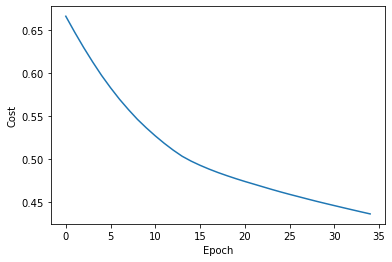

In [2]:
churn_data = pd.read_csv("datasets/churn_data.csv")
df1 = churn_data.copy()

from sklearn.model_selection import train_test_split
X = df1.drop(['churn'], axis=1)
Y = df1['churn']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=30)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = X_train_scaled.T
X_test_scaled = X_test_scaled.T

Y_train = Y_train.to_numpy().reshape(1,X_train_scaled.shape[1])
Y_test = Y_test.to_numpy().reshape(1,X_test_scaled.shape[1])

d1 = L_model(X_train_scaled, Y_train, X_test_scaled, Y_test, 
             [7, 7, 1], # 3-layer
             epoch = 3500, lr = 0.003, print_cost = True, print_size = 100)

import matplotlib.pyplot as plt

plt.plot(d1['costs'])
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

İki katmanlı model için de aynı veri setini kullanmıştık. Fakat orada ReLU yerine Tanh() fonksiyonunu kullanmıştık. Bu açıdan üstte kurduğumuz modeli, iki katman olarak ayarlarsak ve önceki dersteki parametreleri aynen uygularsak, yine farklı sonuçlarla karşılaşırız. Öylese genel olarak; katman sayısı, katmanlardaki nöron sayıları ve learning_rate parametresi değiştirilerek modelimizi optimize edebiliriz.

In [3]:
d1

{'layers': [27, 7, 7, 1],
 'costs': [0.6662798517440328,
  0.6476090639714597,
  0.6298266159287182,
  0.6131423156999168,
  0.5974091784106702,
  0.5831048276029465,
  0.5697427376706232,
  0.5576757011179792,
  0.5463796995576956,
  0.5363909264045827,
  0.527098849661196,
  0.5184694690607216,
  0.5105467416239864,
  0.5034198459912297,
  0.49777317756058737,
  0.4929013767512482,
  0.4885067444900313,
  0.48449969069499343,
  0.4808412169451978,
  0.4773728707543075,
  0.474108594527217,
  0.4710361928953186,
  0.46794426727515426,
  0.46486774034724,
  0.4619224495584955,
  0.45910929358867786,
  0.45642225271684544,
  0.45370776547291003,
  0.4510555723384315,
  0.4485237193911036,
  0.44603634863126035,
  0.44356893574917056,
  0.4411336908915043,
  0.4387212658741606,
  0.43635918827611947],
 'Y_hat_test': array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 1., 0., 0., 

## ÖRNEK 2

Daha önceki iki derste ÖRNEK 3'te kullandığımız görsel tanımlama veri setini bu örneğimizde kullanacağız. Veri setimizdeki resimlerin kedi olup-olmadığını tahmin eden bir model oluşturacağız.

X_train boyutu:  (12288, 209)
Y_train boyutu:  (1, 209)
X_test boyutu:  (12288, 50)
Y_test boyutu:  (1, 50)
Epoch: 0, Cost: 0.771749
Epoch: 100, Cost: 0.672053
Epoch: 200, Cost: 0.648263
Epoch: 300, Cost: 0.611507
Epoch: 400, Cost: 0.567047
Epoch: 500, Cost: 0.540138
Epoch: 600, Cost: 0.527930
Epoch: 700, Cost: 0.465477
Epoch: 800, Cost: 0.369126
Epoch: 900, Cost: 0.391747
Epoch: 1000, Cost: 0.315187
Epoch: 1100, Cost: 0.272700
Epoch: 1200, Cost: 0.237419
Epoch: 1300, Cost: 0.199601
Epoch: 1400, Cost: 0.189263
Epoch: 1500, Cost: 0.161189
Epoch: 1600, Cost: 0.148214
Epoch: 1700, Cost: 0.137775
Epoch: 1800, Cost: 0.129740
Epoch: 1900, Cost: 0.121225
Epoch: 2000, Cost: 0.113821
Epoch: 2100, Cost: 0.107839
Epoch: 2200, Cost: 0.102855
Epoch: 2300, Cost: 0.100897
Epoch: 2400, Cost: 0.092878
Train Accuracy: 98.56459330143541 %
Test Accuracy: 80.0 %


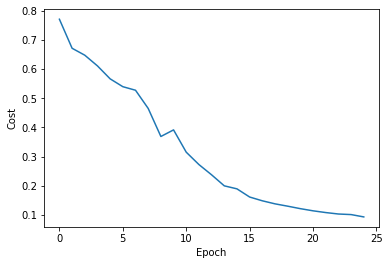

In [4]:
import h5py   
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) 

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) 
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) 

    classes = np.array(test_dataset["list_classes"][:]) 
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

d2 = L_model(train_set_x, train_set_y, test_set_x, test_set_y,
             [20, 7, 5, 1], # 4-layer
             epoch = 2500, lr = 0.0075, print_cost = True, print_size = 100)

plt.plot(d2['costs'])
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

Bir önceki derste iki katmanlı kurduğumuz YSA modeli de, %80 doğruluk oranı göstermişti. Şimdi de veri seti dışından vereceğimiz resimlerin ne kadarını tahmin edebileceğini inceleyelim.

Modelimiz bu resmin KEDİ OLMADIĞINI söyledi


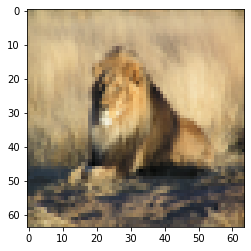

Modelimiz bu resmin KEDİ OLDUĞUNU söyledi


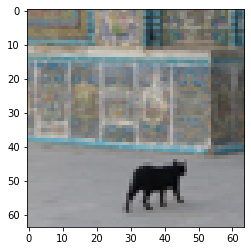

Modelimiz bu resmin KEDİ OLDUĞUNU söyledi


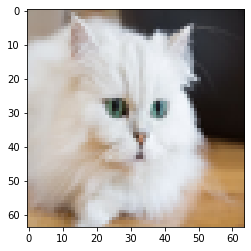

Modelimiz bu resmin KEDİ OLMADIĞINI söyledi


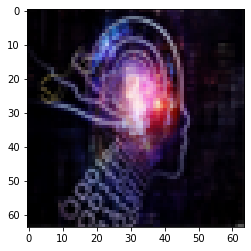

Modelimiz bu resmin KEDİ OLMADIĞINI söyledi


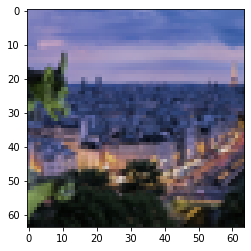

In [5]:
# veri setinde olmayan resimlerle, modelin denenmesi.
from PIL import Image
from matplotlib.pyplot import imshow

for kedi in range(5):
    # resim dosyasının dizini
    fname = "images/kedi" + str(kedi) +".jpg" 

    # resim dosyası açılır, üstte belirlenen num_px değerine resize olur.
    img = Image.open(fname)
    im_resized = img.resize(size=(num_px, num_px))
    
    # resmin piksellerinin standardizasyonu
    arr_img = np.asarray(im_resized)
    arr_img = arr_img/255.
    
    # resmin piksellerinin predict() fonksiyonunda kullanılabilir hale getirilmesi.
    my_image = arr_img.reshape((1, num_px*num_px*3)).T
    
    # tahmin işlemi.
    my_predicted_image = predict(d2["parameters"], my_image)

    # tahmin etiketinin belirlenmesi.
    if np.squeeze(my_predicted_image):
        pred = "KEDİ OLDUĞUNU"
    else:
        pred = "KEDİ OLMADIĞINI"
    
    # sonuç.
    print("Modelimiz bu resmin", pred ,"söyledi")

    # tahmin edilen resmin ekranda gösterilmesi.
    plt.figure()
    plt.imshow(np.asarray(im_resized))
    plt.show()

Bundan önceki iki derste incelediğimiz lojistik regresyon ve iki katmanlı YSA modeli, veri seti dışından verdiğimiz aynı 5 resmin tamamını doğru tahmin edememişlerdi. Son kurduğumuz 4 katmanlı YSA modeli ise bu **5 resmin tamamını doğru tahmin etti**. 

<h4 style="text-align:right">Zeki ÇIPLAK</h4>